# NIGERIA ELECTION ANALYSIS UDING MACHINE LEARNING
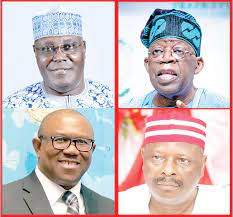

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import glob
import tweepy as tw
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from warnings import filterwarnings
filterwarnings('ignore')
from importlib import reload
plt=reload(plt)
%matplotlib inline



### MERGING ALL OUR KEYWORDS INTO ONE CSV

In [2]:
path = "./MY DATA"
files = [file for file in os.listdir(path) if not file.startswith('.')]

all_keywords = pd.DataFrame()
for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_keywords = pd.concat([all_keywords, current_data])

all_keywords.to_csv("all_tweets_copy.csv", index=False)





### Reading our updated dataframe

In [3]:

df = pd.read_csv("all_tweets_copy.csv")
df.head()


Unnamed: 0      tweet_id                       time  \
0           0  1.553442e+18  2022-07-30 18:05:57+00:00   
1           1  1.553442e+18  2022-07-30 18:05:50+00:00   
2           2  1.553442e+18  2022-07-30 18:05:34+00:00   
3           3  1.553442e+18  2022-07-30 18:05:25+00:00   
4           4  1.553442e+18  2022-07-30 18:05:24+00:00   

                                               tweet  retweet_count  \
0  RT @hillznglitzz: Obukpa ward in Nsukka LG of ...            NaN   
1  RT @Josmi_Official: Please lets blow this whis...            NaN   
2  RT @PeterObiVol: #ObiStructure ongoing now at ...            NaN   
3  RT @Nathaniel_38854: If you know your candidat...            NaN   
4  RT @FS_Yusuf_: I think it’s time for @verified...            NaN   

   Unnamed: 0.1 User Date_Created Source of Tweet Tweet  
0           NaN  NaN          NaN             NaN   NaN  
1           NaN  NaN          NaN             NaN   NaN  
2           NaN  NaN          NaN             NaN   NaN  
3           NaN  NaN          NaN             NaN   NaN  
4           NaN  NaN          NaN             NaN   NaN

### DATA PREPARATION
checking to see what our dataset looks like

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381732 entries, 0 to 381731
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       381732 non-null  int64  
 1   tweet_id         378731 non-null  float64
 2   time             378731 non-null  object 
 3   tweet            378731 non-null  object 
 4   retweet_count    336647 non-null  float64
 5   Unnamed: 0.1     336647 non-null  float64
 6   User             3001 non-null    object 
 7   Date_Created     3001 non-null    object 
 8   Source of Tweet  3001 non-null    object 
 9   Tweet            3001 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 29.1+ MB


In [5]:
# checking the number of entries and attributes in our dataset

df.shape

(381732, 10)

### Our dataset has a total of 381732 entries. The columns that we will use are Tweet_id, Date, Tweet, and Retweet_count.

### We are going to drop the remaining column because we do not need them in our analysis


### Excluding unwanted columns from our Dataset

In [6]:
# Dropping unwanted columns
#df = df.drop(['Unnamed: 0','Unnamed: 0.1','User','Date_Created','Source of Tweet'],axis =1)
cols_to_drop = ['Unnamed: 0','Unnamed: 0.1','User','Date_Created','Source of Tweet','Tweets']
df = df[[col for col in df.columns if not col in cols_to_drop]]

df.head()

tweet_id                       time  \
0  1.553442e+18  2022-07-30 18:05:57+00:00   
1  1.553442e+18  2022-07-30 18:05:50+00:00   
2  1.553442e+18  2022-07-30 18:05:34+00:00   
3  1.553442e+18  2022-07-30 18:05:25+00:00   
4  1.553442e+18  2022-07-30 18:05:24+00:00   

                                               tweet  retweet_count Tweet  
0  RT @hillznglitzz: Obukpa ward in Nsukka LG of ...            NaN   NaN  
1  RT @Josmi_Official: Please lets blow this whis...            NaN   NaN  
2  RT @PeterObiVol: #ObiStructure ongoing now at ...            NaN   NaN  
3  RT @Nathaniel_38854: If you know your candidat...            NaN   NaN  
4  RT @FS_Yusuf_: I think it’s time for @verified...            NaN   NaN

### Let us take a random peak on our dataset

In [7]:
df = df[['tweet_id','time', 'tweet', 'retweet_count']]
df.sample(20)

tweet_id                       time  \
357395  1.553805e+18  2022-07-31 18:10:32+00:00   
7236    1.553424e+18  2022-07-30 16:53:48+00:00   
271709  1.553659e+18  2022-07-31 08:30:06+00:00   
208280  1.553276e+18  2022-07-30 07:05:25+00:00   
71691   1.553651e+18  2022-07-31 07:58:52+00:00   
223419  1.552324e+18  2022-07-27 16:04:26+00:00   
342329  1.553833e+18  2022-07-31 20:00:17+00:00   
90114   1.553390e+18  2022-07-30 14:39:46+00:00   
158396  1.553807e+18  2022-07-31 18:17:09+00:00   
128683  1.553382e+18  2022-07-30 14:09:08+00:00   
74293   1.553620e+18  2022-07-31 05:52:40+00:00   
317497  1.553663e+18  2022-07-31 08:45:13+00:00   
23307   1.553437e+18  2022-07-30 17:48:38+00:00   
157410  1.553811e+18  2022-07-31 18:31:16+00:00   
333424  1.553850e+18  2022-07-31 21:06:46+00:00   
23986   1.553436e+18  2022-07-30 17:44:15+00:00   
250988  1.553818e+18  2022-07-31 19:01:25+00:00   
97422   1.553333e+18  2022-07-30 10:55:12+00:00   
195838  1.553700e+18  2022-07-31 11:13:12+00:00   
75619   1.553571e+18  2022-07-31 02:38:18+00:00   

                                                    tweet  retweet_count  
357395  RT @NGRLabourParty: OBIdients are NOT complain...          138.0  
7236    RT @Mohammadpato1: APC presidential candidate ...            NaN  
271709  @demola6319 @ShehuSani I wish he leaves even A...            0.0  
208280  @Joshogbonna2 @PeterObi @NgLabour Pls tell the...            0.0  
71691   RT @Chude__: The decision that changed everyth...           54.0  
223419  RT @PO_GrassRoots: Dear @NgLabour, be steadfas...          229.0  
342329  @the_Lawrenz @Dayviid_OG She thinks she’s Pete...            0.0  
90114   RT @firstladyship: Vox Populi, Vox Dei - “voic...          945.0  
158396  RT @AishaYesufu: If Atiku wins 2023 election, ...         9878.0  
128683  RT @Joshogbonna2: As @PeterObi continue to vis...         2434.0  
74293   RT @firstladyship: Peter Obi is no longer a Tw...         2067.0  
317497  RT @Spotlight_Abby: Their strategies are all a...          109.0  
23307   RT @AishaYesufu: Is Peter Obi @PeterObi still ...            NaN  
157410  RT @FS_Yusuf_: Two veteran Nollywood actors ar...          630.0  
333424  RT @aminurus: They started with Twitter Presid...          989.0  
23986   RT @iam_polymath: I've noticed that peter Obi ...            NaN  
250988  RT @obeitohonipe: APC is not about TINUBU or B...          161.0  
97422   RT @woye1: Look for another church, If you are...          324.0  
195838  RT @Jack_ng01: 2023 elections is not between T...         1227.0  
75619   @ElokaSuccess @olasodiq604 @UchePOkoye So Sout...            0.0

### DATA CLEANING

Checking for missing Values

In [8]:
# checking if there are any null values

df.isnull().sum()

tweet_id          3001
time              3001
tweet             3001
retweet_count    45085
dtype: int64

In [9]:
# Calculating percentage of missing value of each column

percent_missing = round(df.isnull().sum() * 1000 / len(df),2)
percent_missing

tweet_id           7.86
time               7.86
tweet              7.86
retweet_count    118.11
dtype: float64

In [10]:
# finding the percentage of missing values for the entire dataset
percentage_missing = round(df.isnull().sum().sum() * 100 / len(df),2)
percentage_missing

14.17

### Our dataset contains missing values, for each columns this is how we will sort it out

* **tweet_id**: *We will drop the missing values since this is a unique identifier, and you cannot impute it. It should be generated from Twitter.*

* **time**: *We will impute the missing values using backfill.*

* **tweet**: *We will drop the missing values here, since the tweet is the sentiment shared by an individual.*

* **retweet_count**: *We will fill the missing values with '0.*

In [11]:
# Dropping missing values in tweet_id

df.dropna(subset=['tweet_id'], inplace=True)

# by dropping the missing values in tweet_id, tweets with missing values also got dropped

In [12]:
# forward filling and backward filling the missing dates

df['time'] = df['time'].ffill().bfill()

In [13]:
# filling missing values in retweet_count column with '0'

df['retweet_count'] = df['retweet_count'].fillna(0)

In [14]:
# Checking to see if missing values have been resolved

df.isnull().sum()

tweet_id         0
time             0
tweet            0
retweet_count    0
dtype: int64

In [15]:
#checking the datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378731 entries, 0 to 378730
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   tweet_id       378731 non-null  float64
 1   time           378731 non-null  object 
 2   tweet          378731 non-null  object 
 3   retweet_count  378731 non-null  float64
dtypes: float64(2), object(2)
memory usage: 14.4+ MB


### Changing retweet_count and Time column datatype to int and  DateTime respectively

In [16]:
# Changing the datatype 
df['retweet_count'] = df['retweet_count'].astype(int)
df['time'] =pd.to_datetime(df['time'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378731 entries, 0 to 378730
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   tweet_id       378731 non-null  float64            
 1   time           378731 non-null  datetime64[ns, UTC]
 2   tweet          378731 non-null  object             
 3   retweet_count  378731 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(1)
memory usage: 14.4+ MB


### Checking for duplicates

In [17]:
# checking if we have duplicates in our 'tweet_id' column since it is out unique identifier
df['tweet_id'].duplicated().sum()

87645

### The tweet_id has 87645 duplicates, we wil drop them

In [18]:
# dropping the duplicates in the tweet_id column
df.drop_duplicates(subset=['tweet_id'], keep='last', inplace=True)


In [19]:
df['tweet'].dropna(how='all')

113       @Josmi_Official @PeterObi @PeterPsquare @Jeffr...
235       RT @JardaniJovonovv: @FS_Yusuf_ @verified @NgL...
236       RT @FS_Yusuf_: I think it’s time for @verified...
970       RT @FS_Yusuf_: I think it’s time for @verified...
1011      RT @seunogbe: I have just succeeded in convinc...
                                ...                        
378726    RT @AfamDeluxo: Peter Obi is trending in Tarab...
378727    RT @Victorymartplc: @Adebayo41026259 will be p...
378728    RT @Morris_Monye: Guide to deliver Peter Obi\n...
378729    RT @adamugarba: The only reason why I don’t co...
378730    RT @OBIMAKAMA2023: I want to cordial invite yo...
Name: tweet, Length: 291086, dtype: object

In [20]:
# checking if we have duplicates in our 'tweet'
df['tweet'].duplicated().sum()

227422

**we have 227422 duplicated tweets, le us drop them**

In [21]:
# dropping the duplicates in the tweet column
df.drop_duplicates(subset=['tweet'], keep='last', inplace=True)


### Checking for cardinality

In [22]:
# Number of unique values in the election dataset
print('Cardinality of the dataset columns:\n')
for i in df.columns:
  print(f'{i:<5} : {df[i].nunique()}')


Cardinality of the dataset columns:

tweet_id : 63664
time  : 51555
tweet : 63664
retweet_count : 1037


In [23]:
# checking shape of our final dataset
df.shape

(63664, 4)

In [24]:
# saving the cleaned dataset to a csv file

df.to_csv('cleaned_df.csv')

### Exploratory Data Analysis


In [25]:
clean_df = pd.read_csv('cleaned_df.csv')

In [26]:
# creating a Function to clean the tweets further

import re

def cleanTxt(text):
  
  text = re.sub(r'@[A-Za-z0-9_]+','',str(text)) # Removing @mentions
  text = re.sub(r'#','',str(text)) # Removing the '#' symbol
  text = re.sub(r'RT[\s]+','',str(text))  # Removing RT
  text = re.sub(r'https?:\/\/\S+', '',str(text)) # Removing the hyper link
  text = re.sub(r':', '',str(text)) # Removing the ':'
  text = re.sub(r';', '',str(text)) # Removing the ';'
  text = re.sub(r'\n', '',str(text)) # Removing the '\n'
  text = re.sub(r'1', '',str(text)) # Removing the '1'
  text = re.sub(r'_', '',str(text)) # Removing the '1'

  return text

clean_df['tweet'] = clean_df['tweet'].apply(cleanTxt)

# Showing cleaned text

clean_df.head()



Unnamed: 0      tweet_id                       time  \
0         113  1.553438e+18  2022-07-30 17:52:09+00:00   
1         235  1.553434e+18  2022-07-30 17:36:03+00:00   
2        1796  1.553375e+18  2022-07-30 13:38:36+00:00   
3        1798  1.553374e+18  2022-07-30 13:37:55+00:00   
4        1850  1.553371e+18  2022-07-30 13:23:46+00:00   

                                               tweet  retweet_count  
0                       Money sitting idle? Move i…               0  
1                               Even you need to be               0  
2   Nice men sell Ice cream 🍦!!!!!!!!!!!!! Please...              0  
3  Nice men sell Ice cream 🍦!!!!!!!!!!!!! Please ...              0  
4     it is only a cursed nation that will bring ...              0

In [27]:
clean_df.shape

(63664, 5)

In [28]:
#! pip install textblob

from textblob import TextBlob

# Creating a function to get the subjectivity

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# creating a function to get the polarity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Creating two additional columns to check the Subjectivity and polarity

clean_df['Subjectivity'] = clean_df['tweet'].apply(getSubjectivity)
clean_df['Polarity'] = clean_df['tweet'].apply(getPolarity)

# Checking the dataframe

clean_df.head(10)

Unnamed: 0      tweet_id                       time  \
0         113  1.553438e+18  2022-07-30 17:52:09+00:00   
1         235  1.553434e+18  2022-07-30 17:36:03+00:00   
2        1796  1.553375e+18  2022-07-30 13:38:36+00:00   
3        1798  1.553374e+18  2022-07-30 13:37:55+00:00   
4        1850  1.553371e+18  2022-07-30 13:23:46+00:00   
5        1937  1.553367e+18  2022-07-30 13:07:47+00:00   
6        2201  1.553354e+18  2022-07-30 12:16:23+00:00   
7        2233  1.553353e+18  2022-07-30 12:11:47+00:00   
8        2862  1.553329e+18  2022-07-30 10:39:35+00:00   
9        2892  1.553328e+18  2022-07-30 10:35:27+00:00   

                                               tweet  retweet_count  \
0                       Money sitting idle? Move i…               0   
1                               Even you need to be               0   
2   Nice men sell Ice cream 🍦!!!!!!!!!!!!! Please...              0   
3  Nice men sell Ice cream 🍦!!!!!!!!!!!!! Please ...              0   
4     it is only a cursed nation that will bring ...              0   
5                                Edo State??No worry              0   
6       In this matter, a Muslim candidate can al...              0   
7     Muslims will not allow Obi to enter their m...              0   
8   If you like vex..I call him my President. Vot...              0   
9  If you like vex..I call him my President. Vote...              0   

   Subjectivity  Polarity  
0        0.0000    0.0000  
1        0.0000    0.0000  
2        0.6875    0.4375  
3        0.6875    0.4375  
4        1.0000    0.0000  
5        0.0000    0.0000  
6        0.0000    0.0000  
7        0.0000    0.0000  
8        0.0000    0.0000  
9        0.0000    0.0000

<AxesSubplot:xlabel='Subjectivity', ylabel='Density'>

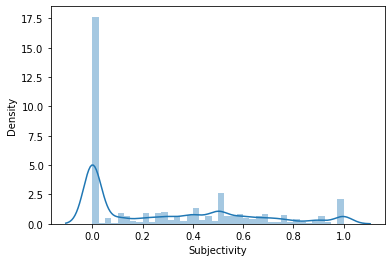

In [29]:
sns.distplot(clean_df['Subjectivity'])
#Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information
# it is in range [0,1]

<AxesSubplot:xlabel='Polarity', ylabel='Density'>

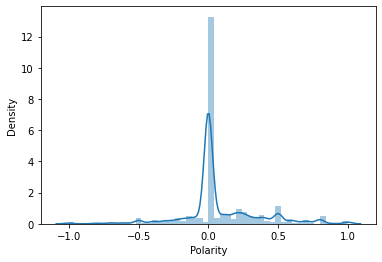

In [30]:
sns.distplot(clean_df['Polarity'])
#Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement

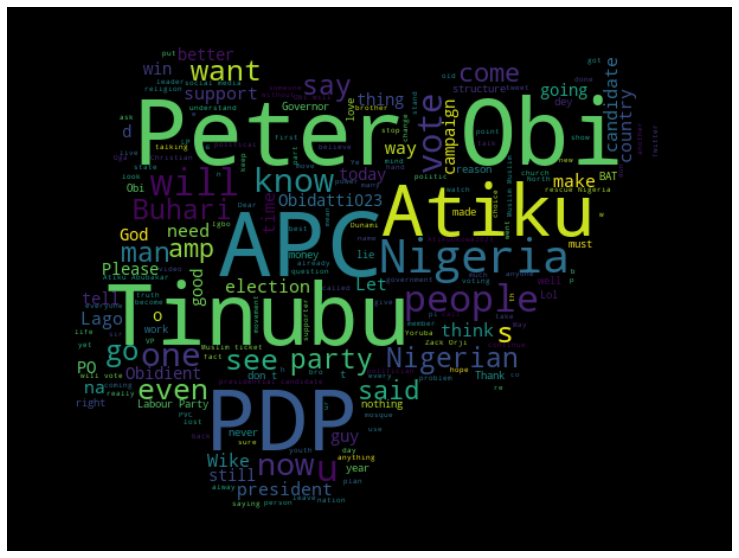

In [31]:
# plotting Word Cloud

from wordcloud import WordCloud, STOPWORDS
from PIL import Image, ImageFont

stopwords = set(STOPWORDS)

mask = np.array(Image.open("n.jpg"))


allWords = ' '.join([twts for twts in clean_df['tweet']])

wordCloud = WordCloud(width = 1000, height = 600, random_state = 35, max_font_size = 206,
                    mask = mask,background_color='black',stopwords = stopwords).generate(allWords)

plt.figure( figsize = (20,10))
plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [32]:
# Creating a function to compute the negative, neutral and positive sentiments in our data

def getAnalysis(score):
  if score < 0: 
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'    

# Creating another feature called Analysis to store the scores

clean_df['Analysis'] = clean_df['Polarity'].apply(getAnalysis) 

# Checking the data

clean_df.head()


Unnamed: 0      tweet_id                       time  \
0         113  1.553438e+18  2022-07-30 17:52:09+00:00   
1         235  1.553434e+18  2022-07-30 17:36:03+00:00   
2        1796  1.553375e+18  2022-07-30 13:38:36+00:00   
3        1798  1.553374e+18  2022-07-30 13:37:55+00:00   
4        1850  1.553371e+18  2022-07-30 13:23:46+00:00   

                                               tweet  retweet_count  \
0                       Money sitting idle? Move i…               0   
1                               Even you need to be               0   
2   Nice men sell Ice cream 🍦!!!!!!!!!!!!! Please...              0   
3  Nice men sell Ice cream 🍦!!!!!!!!!!!!! Please ...              0   
4     it is only a cursed nation that will bring ...              0   

   Subjectivity  Polarity  Analysis  
0        0.0000    0.0000   Neutral  
1        0.0000    0.0000   Neutral  
2        0.6875    0.4375  Positive  
3        0.6875    0.4375  Positive  
4        1.0000    0.0000   Neutral

In [33]:
clean_df['Analysis']

0         Neutral
1         Neutral
2        Positive
3        Positive
4         Neutral
           ...   
63659     Neutral
63660     Neutral
63661     Neutral
63662    Negative
63663    Positive
Name: Analysis, Length: 63664, dtype: object

In [34]:
# Printing all the Positive tweets

j = 1

sort_df = clean_df.sort_values(by='Polarity')
for i in range(0, 50):
  if (sort_df['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+sort_df['tweet'][i])
    print()
    j = j+1


1)  Nice men sell Ice cream 🍦!!!!!!!!!!!!! Please PeterObi let start getting mergers with other party.These people up there a…

2) Nice men sell Ice cream 🍦!!!!!!!!!!!!! Please PeterObi let start getting mergers with other party.These people up… 

3)    Calm down na😂😂😂He can't be everywhere at a time.

4)  Igbos make so much noise when it comes to social media, by the time they begin to see crowd up North for APC , then they w…

5) Igbos make so much noise when it comes to social media, by the time they begin to see crowd up North for APC , then… 

6)  So, Kwara is worse? I thought they said they are enjoying their APC government.

7)  Let say the facts, people don't like the way APC are handling the social media platforms for the mobiliz… 

8)   Mr. Tribal cocoon, do you know or love the Yoruba tribe more than Pa Adebanjo? Until yo… 

9)  You really need to take your medicine,you can't wish Nigeria well and vote for Apc

10)     No it’s not an old video, the video is incomplete, he st

In [35]:
# Printing all the Negative tweets

j = 1

sort_df = clean_df.sort_values(by='Polarity')
for i in range(0, 50):
  if (sort_df['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sort_df['tweet'][i])
    print()
    j = j+1

1) Ha. The APC and gaslighting. They've gaslighted us through the past 7 years. Propaganda and gaslighting. Never seen… 

2)   It is funny and laughable. As if twitter is been run by ghosts or the humans behind the twit… 

3)    As if you would vote for anybody from APC. We know you hate anything associated with APC.

4)   They should continue.APC guys wasted their social capital promoting Buhari

5)  If you’re voting APC in 2023, you are just not intelligent. There is no other way to put it, you lack wisdom.

6)  Check APC past 8 years which one u no get

7)  That’s where you get it wrong oga imams have always been controlling Nigeria politics since 960, tha… 



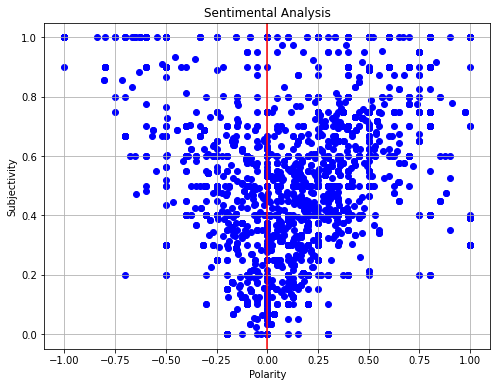

In [36]:
# Plotting the Polarity and Subjectivity

plt.figure(figsize = (8,6))
for i in range(0,5000):
  plt.scatter(clean_df['Polarity'][i],clean_df['Subjectivity'][i], color = 'Blue')

plt.title('Sentimental Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.grid('on')
plt.axvline(x=0,ymin=0,ymax=1,color='red')
plt.show()


In [37]:
# Getting the Percentage of Positive tweets

pos_tweets = clean_df[clean_df.Analysis == 'Positive']
pos_tweets = pos_tweets['tweet']

print(f"We have {round((pos_tweets.shape[0]/clean_df.shape[0])*100,1)}% positive tweets")


We have 33.6% positive tweets


In [38]:
# Getting the Percentage of Negative tweets

neg_tweets = clean_df[clean_df.Analysis == 'Negative']
neg_tweets = neg_tweets['tweet']

print(f"We have {round((neg_tweets.shape[0]/clean_df.shape[0])*100,1)}% negative tweets")

We have 14.3% negative tweets


In [39]:
# Getting the Percentage of Neutral tweets

neutral_tweets = clean_df[clean_df.Analysis == 'Neutral']
neutral_tweets = neutral_tweets['tweet']

print(f"We have {round((neutral_tweets.shape[0]/clean_df.shape[0])*100,1)}% neutral tweets")


We have 52.1% neutral tweets


In [40]:
# i have to plot pie chart for Analysis

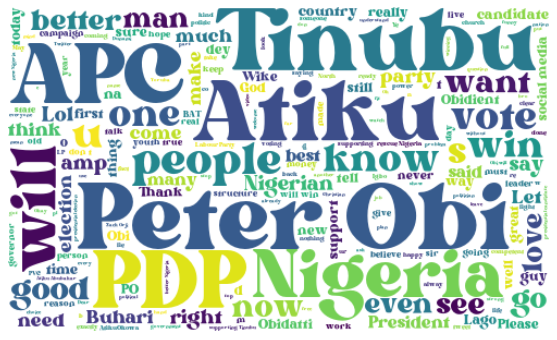

In [41]:
# Plotting Word Cloud for Positive sentiments

stopwords = set(STOPWORDS)

font_path = 'Bright DEMO.otf'

post_Words = ' '.join([twts for twts in pos_tweets])

wordCloud = WordCloud(width = 500, height = 300, random_state = 16, max_font_size = 119,background_color='white',stopwords=STOPWORDS,font_path=font_path).generate(post_Words)

plt.figure( figsize = (14,6))
plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

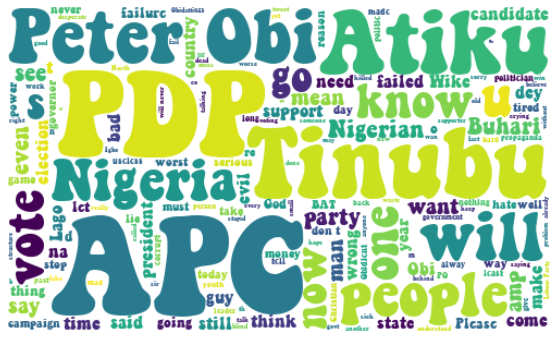

In [42]:
# Plotting Word Cloud for Negative sentiments

stopwords = set(STOPWORDS)

font_path = 'KeeponTruckin.ttf'

negt_words = ' '.join([twts for twts in neg_tweets])

wordCloud = WordCloud(width = 500, height = 300, random_state = 67, max_font_size = 119,background_color='white',stopwords=STOPWORDS,font_path=font_path).generate(negt_words)

plt.figure( figsize = (14,6))
plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

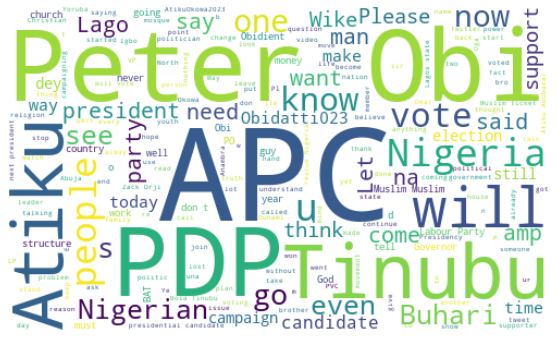

In [43]:
# Plotting Word Cloud for Neutral sentiments

stopwords = set(STOPWORDS)

neutral_words = ' '.join([twts for twts in neutral_tweets])

wordCloud = WordCloud(width = 500, height = 300, random_state = 16, max_font_size = 119,background_color='white',stopwords=STOPWORDS).generate(neutral_words)

plt.figure( figsize = (14,6))
plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()


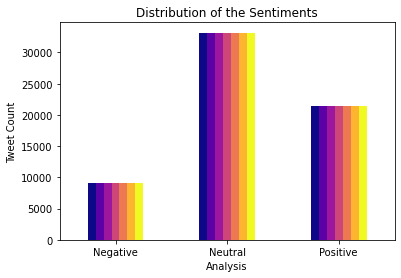

In [44]:
# Plotting the distribution for dataset.

ax = clean_df.groupby('Analysis').count().plot(kind='bar', title='Distribution of the Sentiments',legend=False, cmap='plasma')
ax.set_xticklabels(['Negative','Neutral','Positive'], rotation=0)
ax.set_ylabel('Tweet Count')
plt.show()



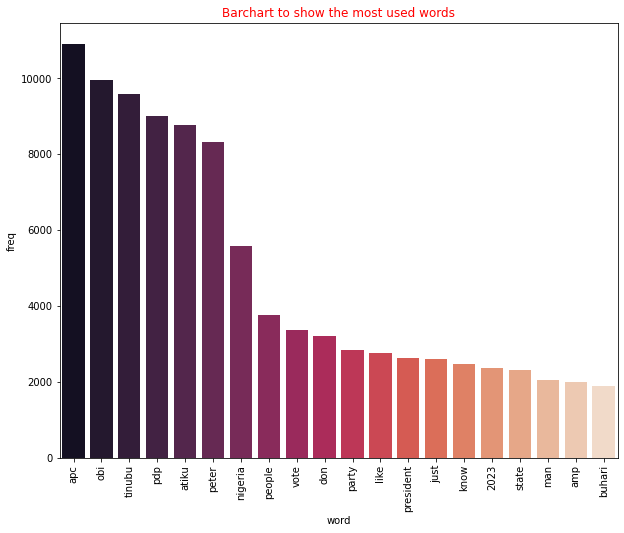

In [45]:
# Checking the Most used individual words

from sklearn.feature_extraction.text  import CountVectorizer
import collections

cv = CountVectorizer(stop_words='english')
bow = cv.fit_transform(clean_df['tweet'])
word_freq = dict(zip(cv.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)
word_counter_df = pd.DataFrame(word_counter.most_common(20), columns = ['word', 'freq'])
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x="word", y="freq", data=word_counter_df, palette="rocket", ax=ax)
plt.xticks(rotation=90)
plt.title('Barchart to show the most used words',color='red')
plt.show()


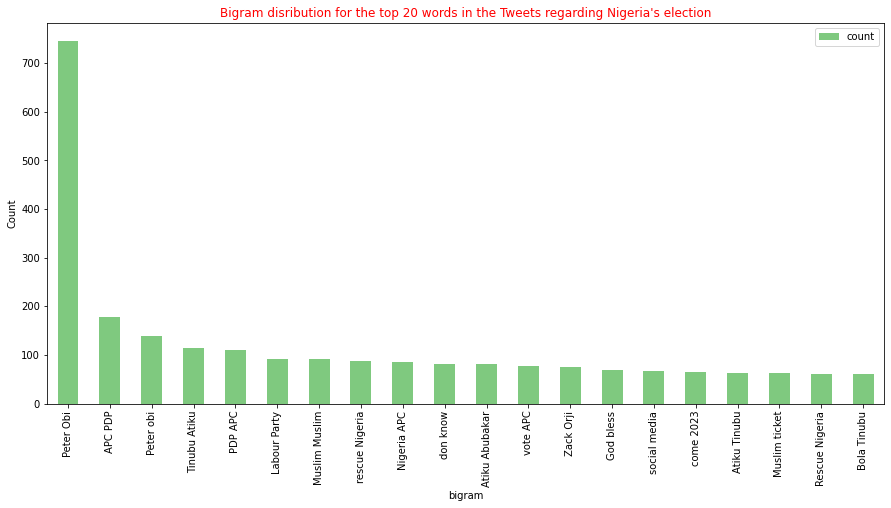

In [46]:
# Checking for Most used two words

#Converting text descriptions into vectors using TF-IDF using Bigram

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(clean_df['tweet'])
total_words = tfidf_matrix.sum(axis=0)
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True)
#Taking first 20 records
bigram = bigram.head(20)
#Plotting the bigram distribution
bigram.plot(x ='bigram', y='count', kind = 'bar', figsize = (15,7),cmap='Accent')
plt.title("Bigram disribution for the top 20 words in the Tweets regarding Nigeria's election", color = 'red')
plt.ylabel('Count')
plt.show()

## K-MEANS CLUSTERING

**We aim to get two clusters: tweets related to politics and irrelevant topics such as marketing.**

**Preprocessing**


In [47]:
clean_df['clean_tweet'] = clean_df['tweet'].str.replace('[^\w\s]', '', regex=True)

# covert tweet to lowercase
clean_df['clean_tweet'] = clean_df['clean_tweet'].apply(lambda x: str(x).lower())
clean_df['clean_tweet']

0                               money sitting idle move i 
1                                     even you need to be 
2         nice men sell ice cream  please peterobi let ...
3        nice men sell ice cream  please peterobi let s...
4           it is only a cursed nation that will bring ...
                               ...                        
63659     peter obi is trending in taraba that is the h...
63660      will be present at vmart launching vmartjoin...
63661     guide to deliver peter obiour volunteers are ...
63662     the only reason why i dont come hard on peter...
63663     i want to cordial invite you to pray for the ...
Name: clean_tweet, Length: 63664, dtype: object

In [48]:
# Tokenization - breaking the raw text into small chunks(sentences into words)

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# apply tokenization function


clean_df['clean_tweet'] = clean_df['clean_tweet'].apply(nltk.word_tokenize)



[nltk_data] Downloading package punkt to /home/captain/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [49]:
df

tweet_id                      time  \
113     1.553438e+18 2022-07-30 17:52:09+00:00   
235     1.553434e+18 2022-07-30 17:36:03+00:00   
1796    1.553375e+18 2022-07-30 13:38:36+00:00   
1798    1.553374e+18 2022-07-30 13:37:55+00:00   
1850    1.553371e+18 2022-07-30 13:23:46+00:00   
...              ...                       ...   
378726  1.553770e+18 2022-07-31 15:50:37+00:00   
378727  1.553770e+18 2022-07-31 15:50:36+00:00   
378728  1.553770e+18 2022-07-31 15:50:36+00:00   
378729  1.553770e+18 2022-07-31 15:50:36+00:00   
378730  1.553770e+18 2022-07-31 15:50:35+00:00   

                                                    tweet  retweet_count  
113     @Josmi_Official @PeterObi @PeterPsquare @Jeffr...              0  
235     RT @JardaniJovonovv: @FS_Yusuf_ @verified @NgL...              0  
1796    RT @iamdominic5: Nice men sell Ice cream 🍦!!!!...              0  
1798    Nice men sell Ice cream 🍦!!!!!!!!!!!!! Please ...              0  
1850    @firstladyship @OfficialAPCNg @NgLabour it is ...              0  
...                                                   ...            ...  
378726  RT @AfamDeluxo: Peter Obi is trending in Tarab...            735  
378727  RT @Victorymartplc: @Adebayo41026259 will be p...              3  
378728  RT @Morris_Monye: Guide to deliver Peter Obi\n...           2144  
378729  RT @adamugarba: The only reason why I don’t co...            162  
378730  RT @OBIMAKAMA2023: I want to cordial invite yo...           1895  

[63664 rows x 4 columns]

In [50]:
#removing stopwords

stop_words = nltk.corpus.stopwords.words('english')
stop_words = stop_words + ['we', 'you', 'you ve', 'need', 'know', 'youre', 'ya', 'na']

# function to remove stopwords

def remove_stopwords(tweet):
    output = [word for word in tweet if word not in stop_words]
    return output

clean_df['clean_tweet']= clean_df['clean_tweet'].map(remove_stopwords)   


In [51]:
clean_df['clean_tweet']

0                             [money, sitting, idle, move]
1                                                   [even]
2        [nice, men, sell, ice, cream, please, peterobi...
3        [nice, men, sell, ice, cream, please, peterobi...
4           [cursed, nation, bring, bat, power, name, bat]
                               ...                        
63659    [peter, obi, trending, taraba, home, state, is...
63660    [present, vmart, launching, vmartjoin, wellbbn...
63661    [guide, deliver, peter, obiour, volunteers, al...
63662    [reason, dont, come, hard, peter, obi, gangs, ...
63663    [want, cordial, invite, pray, success, dedicat...
Name: clean_tweet, Length: 63664, dtype: object

In [52]:
#Lemmatization

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

# function for lemmaization
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text

nltk.download('omw-1.4')

# apply function on tweets
clean_df['clean_tweet'] = clean_df['clean_tweet'].map(lemmatizer)     



[nltk_data] Downloading package wordnet to /home/captain/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/captain/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [53]:
# convert each clean tweet from list into a string
clean_df['string_tweet'] = clean_df['clean_tweet'].apply(lambda x: ' '.join([str(word) for word in x]))



In [54]:
# preview final tweet to vectorize.
clean_df['string_tweet']


0                                  money sitting idle move
1                                                     even
2        nice men sell ice cream please peterobi let st...
3        nice men sell ice cream please peterobi let st...
4                   cursed nation bring bat power name bat
                               ...                        
63659    peter obi trending taraba home state isa panta...
63660    present vmart launching vmartjoin wellbbnaija ...
63661    guide deliver peter obiour volunteer already a...
63662    reason dont come hard peter obi gang 90 suppor...
63663    want cordial invite pray success dedication ob...
Name: string_tweet, Length: 63664, dtype: object

In [55]:


# put cleaned tweet and retweet count in a dataframe
data = clean_df[['string_tweet', 'retweet_count']]



In [56]:
# applying TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['string_tweet'])



In [57]:
# assuming the 2 clusters
from sklearn.cluster import KMeans

k = 2
model = KMeans(n_clusters=k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels = model.labels_


In [58]:
# append labels to a dataframe

df1 = pd.DataFrame(list(zip(data['string_tweet'], labels)), columns = ['tweet', 'cluster'])



In [59]:
# creating cluster dataframes
cluster_1 = df1[df1.cluster == 0]
cluster_2 = df1[df1.cluster == 1]


In [60]:
 #wordcloud plot function 

from wordcloud import WordCloud, STOPWORDS 

def plot_wordcloud(dataframe):
     
     stopwords = set(STOPWORDS) 

     allWords = ' '.join([twts for twts in dataframe['tweet']])

     plt.figure(figsize=(12,5))

     wordCloud = WordCloud(width = 1000, height = 600, random_state = 12, max_font_size = 119, stopwords = stopwords).generate(allWords)

     plt.imshow(wordCloud, interpolation = 'bilinear')

     plt.axis('off')

     return plt.show()


In [61]:
# Checking for Most used two words

#Converting text descriptions into vectors using TF-IDF using Bigram

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

def bigram_plot(dataframe, cluster):
    tf = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', lowercase = False)
    tfidf_matrix = tf.fit_transform(dataframe['tweet'])
    total_words = tfidf_matrix.sum(axis=0)
    #Finding the word frequency
    freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
    freq =sorted(freq, key = lambda x: x[1], reverse=True)
    #converting into dataframe
    bigram = pd.DataFrame(freq)
    bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True)
    #Taking first 20 records
    bigram = bigram.head(20)
    #Plotting the bigram distribution
    bigram.plot(x ='bigram', y='count', kind = 'bar', figsize = (15,7),cmap='Accent')
    plt.title(f"Bigram disribution for the top 20 words({cluster})", color = 'red')
    plt.ylabel('Count')
    return plt.show()



In [62]:
# get sample of tweets in the first cluster
cluster_1.sample(20)



tweet  cluster
45399  apc ready consequence choice muslimmuslim tick...        0
57251   tinubu atiku invested nyse let dont make mistake        0
6710   defection wike pdp govs resolve urge balance l...        0
30774                 perfectly handle kid defeat father        0
32159  pls let begin 2 tone seeming antagonistic stan...        0
47633                     atiku cant vp constitutionally        0
25440  tinubu qualified president tee macveteran flut...        0
19122           next president nigeria ongod obidatti023        0
47691  bcos current governor nowy pple always reason ...        0
41690  apc may lord save wike like saved jonathan she...        0
37857  good point raise question apc twitter thug pos...        0
43935                              apc never scam u like        0
27494                                     please needful        0
47162  professor jerry gana part board trustee soo pd...        0
39405  apc easy ups online srv 3000va 230v extended r...        0
49682  fake promise dont mind apc pdp thing today hea...        0
61749  dont come twitter mtn airtel dash free data co...        0
54625           atiku also make promise he pdp apc favor        0
40859  true nigerian duty ensure vote apc coming 2023...        0
16968              po said share love around obidatti023        0

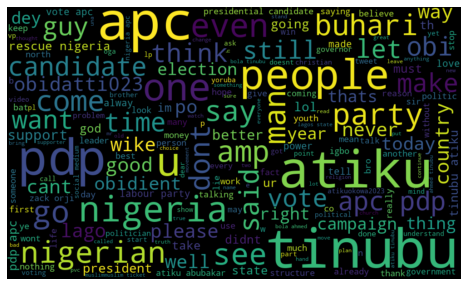

In [63]:
# plot word cloud for first cluster
plot_wordcloud(cluster_1)



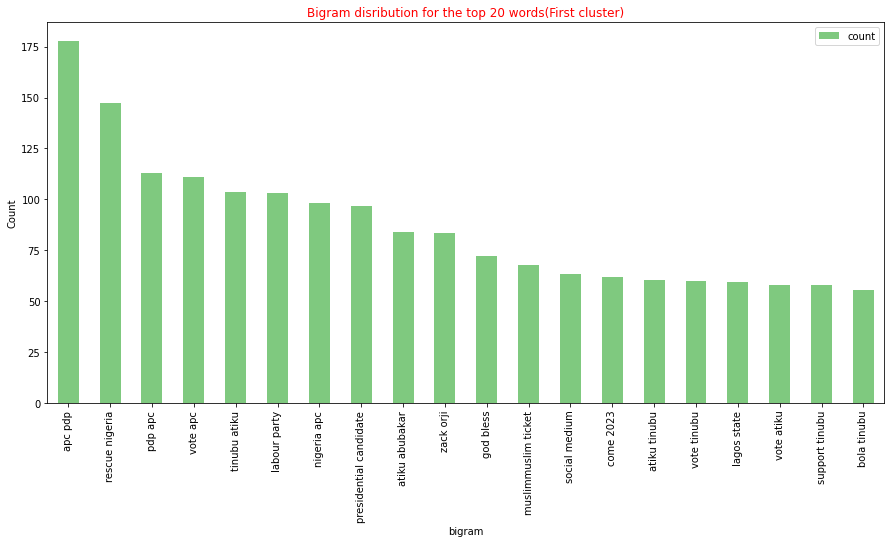

In [64]:
# bigram plot for first cluster
bigram_plot(cluster_1,'First cluster')

**The first cluster contains event surrounding APC and Pdp**

In [65]:
# get sample of tweets in the first cluster
cluster_2.sample(10)


tweet  cluster
58309          come let funpvcpeter obi bbnaijagistlover        1
63000  doctor went strike madinujus tenure peter obi ...        1
53802  follower peter obi anything tbh didnt make sen...        1
53871  vote atiku peter obi tinubu street quiz click ...        1
8033           peter obi overrated another pdp pretender        1
58038  two want president country abeg position fit l...        1
52348  peter obi state take national debt borrowing w...        1
59803  thing twitter day like every post peter obi na...        1
58906  clearly see peter obi big threat notable conte...        1
17000  man prays nigeriai pray man becomes next presi...        1

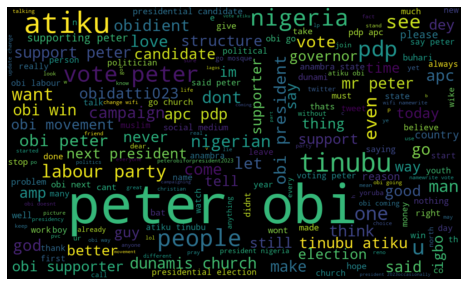

In [66]:
# wordcloud for second cluster
plot_wordcloud(cluster_2)

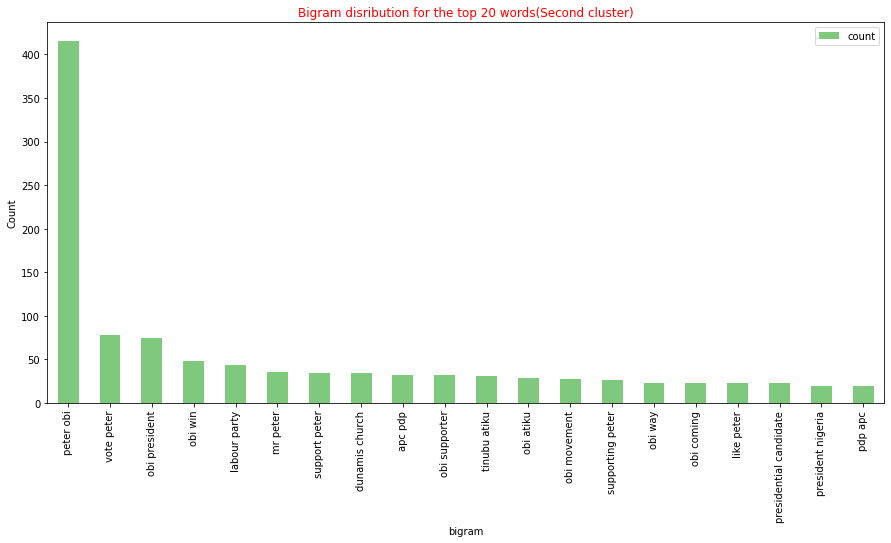

In [67]:
# bigram plot for second cluster
bigram_plot(cluster_2,'Second cluster')



**The second cluster containing events surrounding Peter obi**

### THREE CLUSTERS

In [68]:
# assuming the 3 clusters(APC, PDP, Peter Obi)
from sklearn.cluster import KMeans

k = 3
model = KMeans(n_clusters=k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels = model.labels_

In [69]:
# creating a dataframe for these new clusters
df2 = pd.DataFrame(list(zip(data['string_tweet'], labels)), columns = ['tweet', 'cluster'])



In [70]:
# creating cluster dataframes
cluster_1 = df2[df2.cluster == 0]
cluster_2 = df2[df2.cluster == 1]
cluster_3 = df2[df2.cluster == 2]


In [71]:
# get sample of tweets in the first cluster
cluster_1.sample(10)


tweet  cluster
62373  supporter peterobi twitter account dedicated p...        0
36241  excellency dr peter obi victory nigeriavictory...        0
63062  happened dunamis eye opener victory come peopl...        0
46203                       tinubu atiku voted peter obi        0
59178  reply favour peter obi youth vote right defend...        0
18044  obidients nigeria dragging peter obi lol funny...        0
25795  deceiving urself saying obi perfectly fine ana...        0
61249  always fast spill rubbish peter obi tweet dire...        0
8400   people survived civil war survive one million ...        0
60772  taraba state youth giving peter obi campaign t...        0

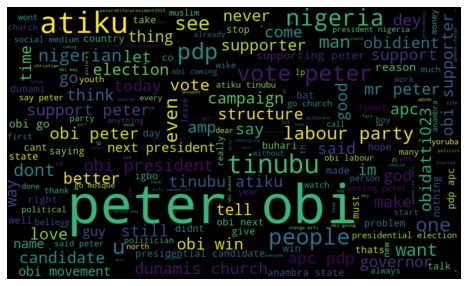

In [72]:
# plot word cloud for first cluster
plot_wordcloud(cluster_1)


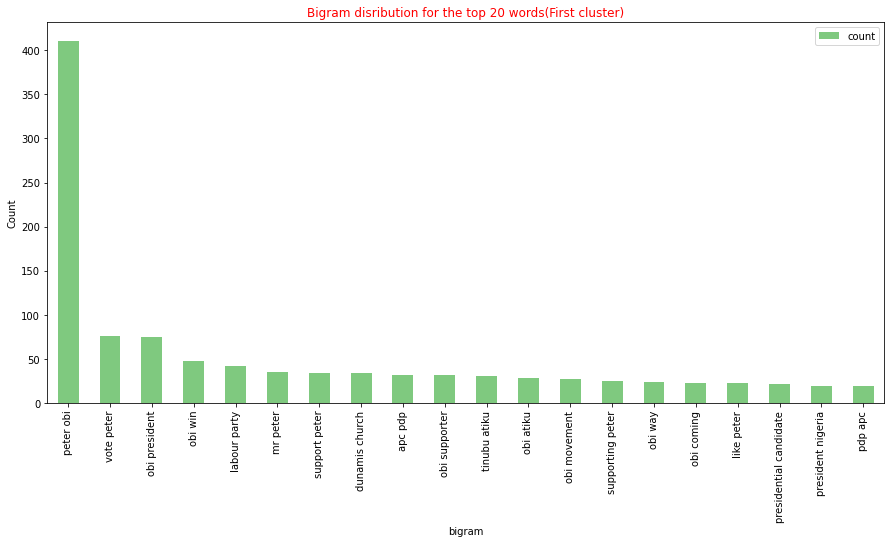

In [73]:
# bigram plot for first cluster
bigram_plot(cluster_1,'First cluster')

**The first cluster focuses on events surrounding APC**

In [74]:
# get sample of tweets in the first cluster
cluster_2.sample(10)



tweet  cluster
22070       shebi tinubu send youhope payment wont shaky        1
56263                                                           1
42494  want tactically separate failure party apc 8ye...        1
52270  started something new song wait keep believing...        1
658      nobody apc said keep feeding deceiving follower        1
24526  emergence lagos capital city predates tinubus ...        1
45543  important thing bearmarket survive bearmarket ...        1
27300                        done long ago really dont w        1
3421   join discussion asiwajus presidency towards pr...        1
37950  jonathan commissioned 30 project north yet nor...        1

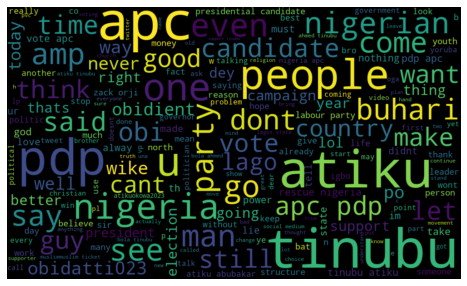

In [75]:
# plot word cloud for second cluster
plot_wordcloud(cluster_2)



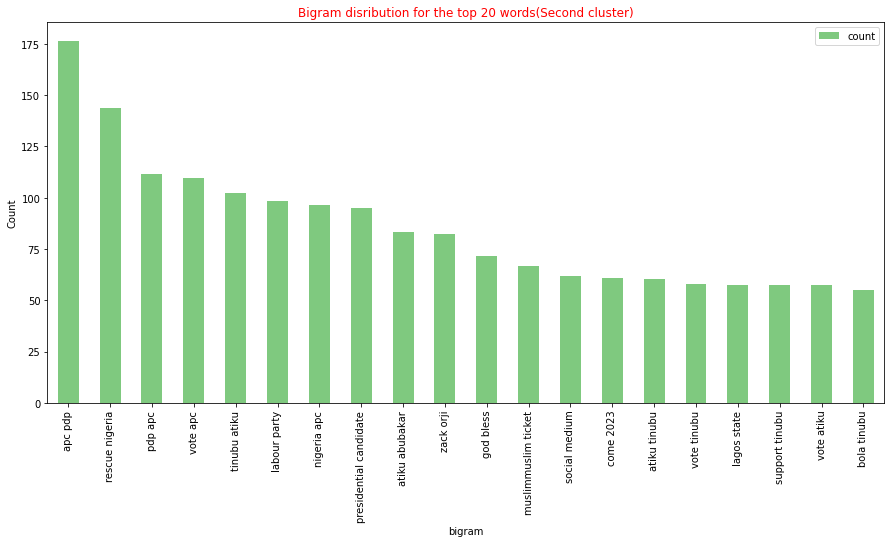

In [76]:
# bigram plot for second cluster
bigram_plot(cluster_2,'Second cluster')


**The second Cluster focuses on event surrounding Peter Obi**

In [77]:
# get sample of tweets in the 3rd cluster
cluster_3.sample(10)


tweet  cluster
50618  christian north voting atiku abubakar religiou...        2
25208  please tell u evil tinubu committed since sre ...        2
50082  please let u kindly avoid presidential candida...        2
51604  shey pdp violated rotation please atiku abeg k...        2
7095               please outside pdp candidate far else        2
21407  please bring tinubu answer question attempt an...        2
18417           peter obi anambra anambra problem please        2
26605  please dont give dude idea last thing want peo...        2
30322                              thanks please retweet        2
34730  please every obidiots obidients obidatti pleas...        2

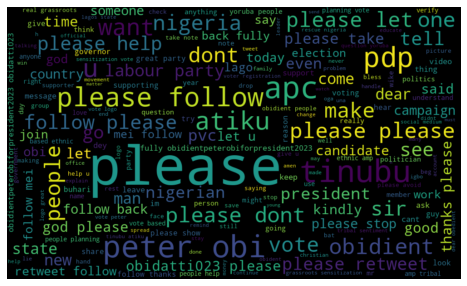

In [78]:
# plot word cloud for third cluster
plot_wordcloud(cluster_3)

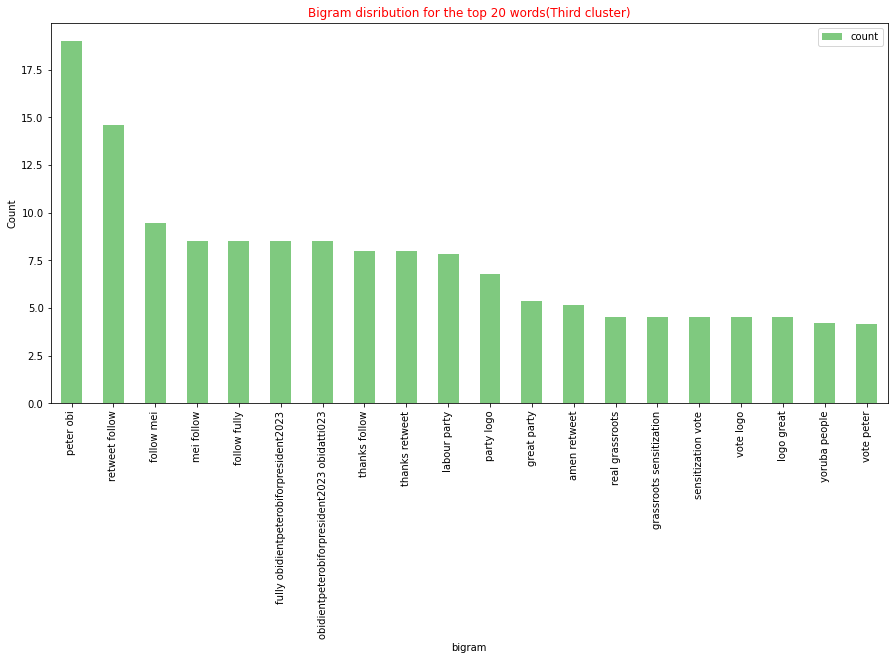

In [79]:
# bigram plot for third cluster
bigram_plot(cluster_3,'Third cluster')



**The third cluster focuses on event surrounding Atiku and Tinubu**

### Finding optimal Number of clusters

In [263]:
# Perform Kmeans

from sklearn.cluster import KMeans

sum_of_squared_distances = []
K = range(1,10)

for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km =km.fit(X)
    sum_of_squared_distances.append(km.inertia_)


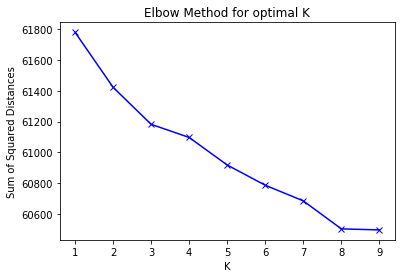

In [264]:
# Plotting the results
plt.plot(K, sum_of_squared_distances,'bx-')
plt.title('Elbow Method for optimal K')
plt.xlabel('K')
plt.ylabel('Sum of Squared Distances') 
plt.show() 


**Elbow method suggest 8 clusters**

In [82]:
# assuming the 8 clusters

from sklearn.cluster import KMeans

k = 8
model = KMeans(n_clusters=k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels = model.labels_



In [83]:
# creating a dataframe for these new clusters
df3 = pd.DataFrame(list(zip(data['string_tweet'], labels)), columns = ['tweet', 'cluster'])


In [84]:
# creating cluster dataframes
cluster_1 = df3[df3.cluster == 0]
cluster_2 = df3[df3.cluster == 1]
cluster_3 = df3[df3.cluster == 2]
cluster_4 = df3[df3.cluster == 3]
cluster_5 = df3[df3.cluster == 4]
cluster_6 = df3[df3.cluster == 5]
cluster_7 = df3[df3.cluster == 6]
cluster_8 = df3[df3.cluster == 7]

In [85]:
# get sample of tweets in the first cluster
cluster_1.sample(10)


tweet  cluster
62780  apc pdp seeing ovation dunamis peter obi stop ...        0
30837  like go vote apc pdp election sapa20 promax ho...        0
55180  go still vote uwwike say u liar believe amna p...        0
45707  tinubu go jumat he worshiping allahwhen obi go...        0
51076  guy making mistake statement people go learnob...        0
35973    fren go siddani picked brain found nothing insi        0
28466         e go die beforeimams dey invite politician        0
27916  surely go north small smallall nigerian must t...        0
49070  real truth bigot mock nigerian youth opportuni...        0
1562   comot belle guy 234 time expecting marry una d...        0

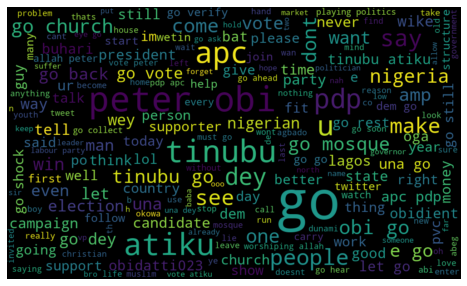

In [86]:
# plot word cloud for first cluster
plot_wordcloud(cluster_1)


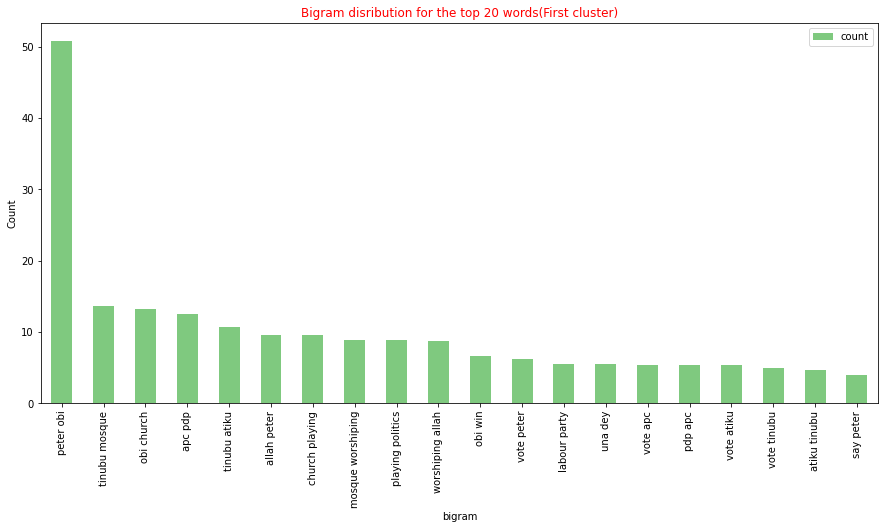

In [87]:
# bigram plot for first cluster
bigram_plot(cluster_1,'First cluster')

### The first cluster contain events surrounding States in Nigeria

In [88]:
# get sample of tweets in the second cluster
cluster_2.sample(10)


tweet  cluster
15326  gshock loversprice 0kfree delivery within port...        1
40351  one apc fanatic come respond yoruba agbajowo l...        1
45322  thank u tweetsome ppl think alone empty arroga...        1
53966                                           wetin v0        1
43208             shouldnt worked political season every        1
36907  misleading even nigeria happened burkina faso ...        1
17876  tactic used sport competition main purpose tac...        1
18178  forgerrit love sweet diemeanwhile get pvcbe ob...        1
19923                         northern never vote tinubu        1
28560                           sure would know aso awka        1

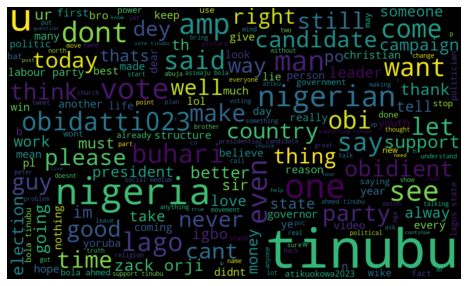

In [89]:
# plot word cloud for second cluster
plot_wordcloud(cluster_2)


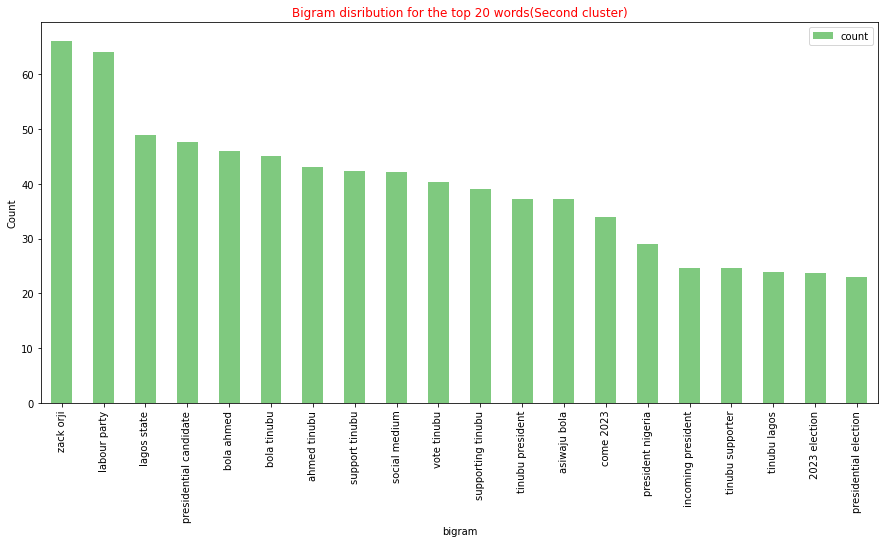

In [90]:
# bigram plot for second cluster
bigram_plot(cluster_2,'Second cluster')


**THe second Cluster contains events surrounding Presidential Candidate Atiku**

In [91]:
# get sample of tweets in the third cluster
cluster_3.sample(10)


tweet  cluster
51138  atiku discovered peter obi keyboard warrior kn...        2
59098  444 year ago muslim celebrating islamic new ye...        2
60070         peter obi nigeria president come 2023 amen        2
16280  pvc structure peter obi win 2023 presidential ...        2
58756      dont agree last tweet except voting peter obi        2
12320  obi opened people eye 209 atiku basked obi glo...        2
31639                       obi nigeria northern problem        2
62636  think peter obi supporter genuine supporter peopl        2
62155  think peter obi different three honesty peter ...        2
59169                                   peter obi answer        2

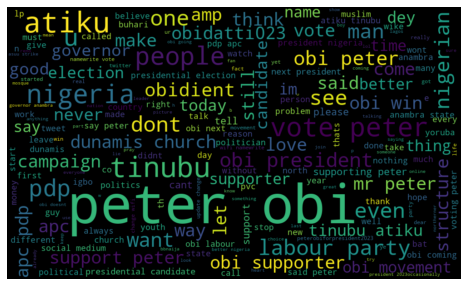

In [92]:
# plot word cloud for third cluster
plot_wordcloud(cluster_3)

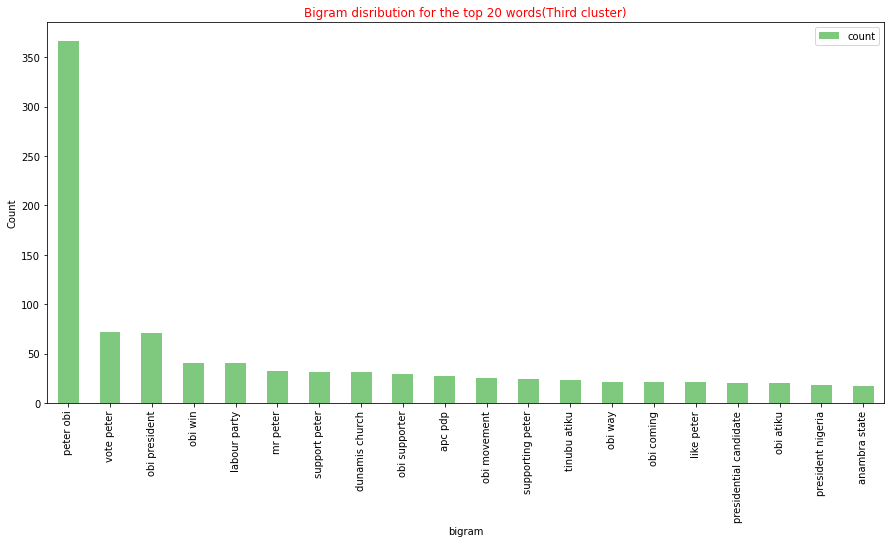

In [93]:
# bigram plot for third cluster
bigram_plot(cluster_3,'Third cluster')



**The third cluster Contains Events Surrounding the party APC**

In [94]:
# get sample of tweets in the fourth cluster
cluster_4.sample(10)

tweet  cluster
18401  love natural thug hired money shared reno sega...        3
57184  shey atiku get belle ni money e chop give fibr...        3
29900   going take back country child grace god almighty        3
54500  god bless national coordinator atikukawai appr...        3
14480         breaking news god apc broom burning2 god p        3
55270                let u wait see god punish come 2023        3
31740                                          god bless        3
32467                            god glory obidatti move        3
58150    god reward bless richly see peter obi succeed b        3
17363  hear god deliver u mehn peterobiforpresident20...        3

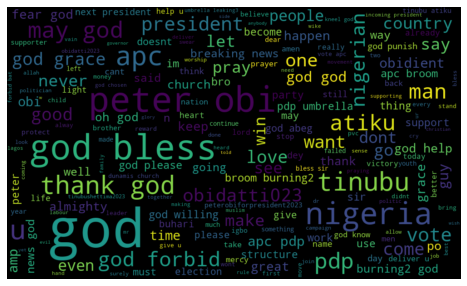

In [95]:
 #plot word cloud for fourth cluster
plot_wordcloud(cluster_4)

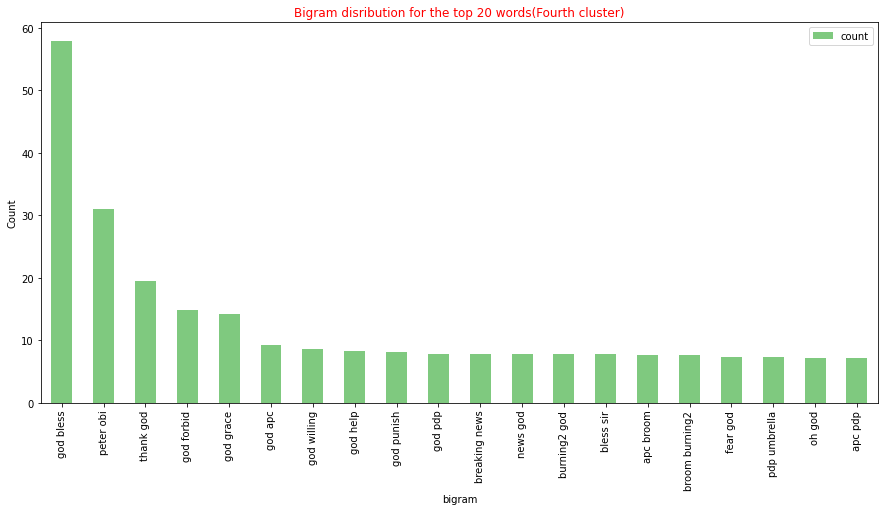

In [96]:
# bigram plot for fourth cluster
bigram_plot(cluster_4,'Fourth cluster')



**The fourth cluster takes a focus off individuals and party to how mobilization will be done for the election**

In [97]:
# get sample of tweets in the fifth cluster
cluster_5.sample(10)


tweet  cluster
49206  atiku discovered exgovernor anambra state dino...        4
48276  dino said atiku one propelling obi ok ooh 2007...        4
54048      atiku chance fight result court stood expecti        4
2252   bold think supported atiku atiku peter obi run...        4
48382                atiku wait holy spirit cleansed sin        4
52140  atiku give u nigeria wherein physically challe...        4
53070  bat record2007 wanted atiku vp200 acn muslim m...        4
52461        way tinubu obi trending atiku still contest        4
48801                       reno bad job marketing atiku        4
49409  useless pdp thank atiku reason support vote po...        4

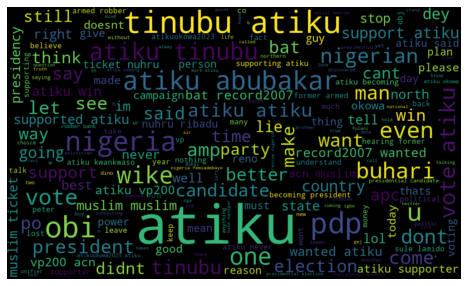

In [98]:
# plot word cloud for fifth cluster
plot_wordcloud(cluster_5)

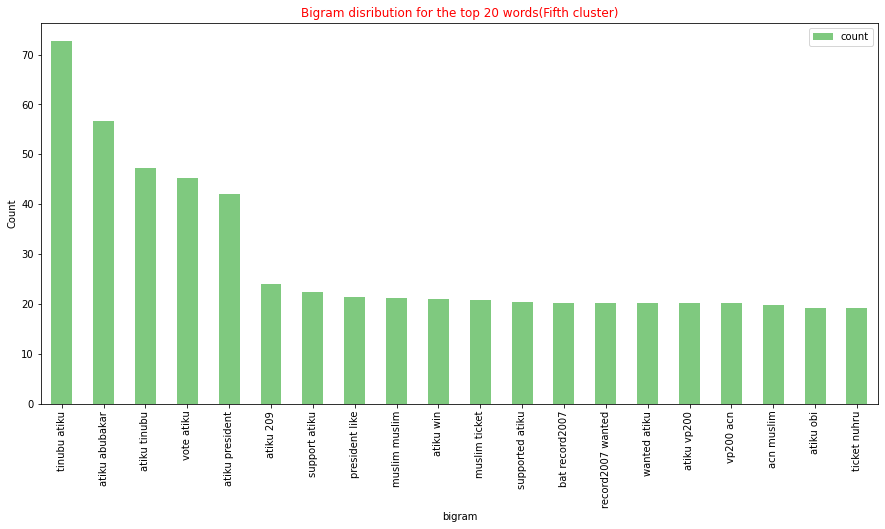

In [99]:
# bigram plot for fifth cluster
bigram_plot(cluster_5,'Fifth cluster')

**The fifth cluster Uses vocabulary surrounding the Labour Party, They have been referred to as social media party by opponents,but they themselves(obedients) claimed they will use the platform to bring rescue nigeria**

In [100]:
# get sample of tweets in the sixth cluster
cluster_6.sample(10)


tweet  cluster
36495                                            apc apc        5
44067  apc ever bring dogara traitor treacherous turn...        5
38319  least apc contact sensible creative influencer...        5
40403  one apc fanatic come respond yoruba agbajowo l...        5
1393   young woman please avoid lolu agoro mental hea...        5
41570  one apc connected bank let check much drug lor...        5
37303                        apc want rescue nigeria apc        5
11680   apc power wasnt bad pdp still want u vote apc ag        5
40159           dont tell apc woman make jejely waka pas        5
45152  naijanews apc babachir dogara clear air visite...        5

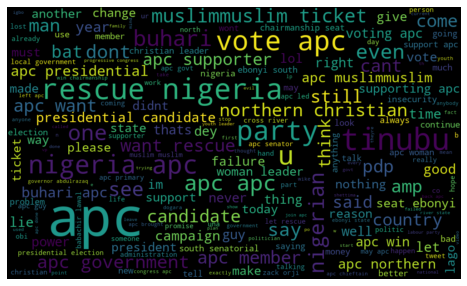

In [101]:
# plot word cloud for sixth cluster
plot_wordcloud(cluster_6)


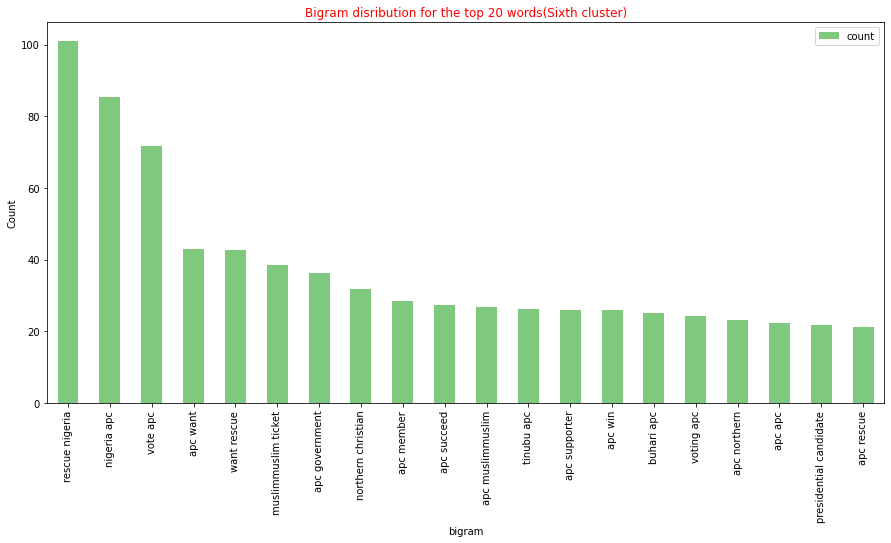

In [102]:
# bigram plot for sixth cluster
bigram_plot(cluster_6,'Sixth cluster')

**The 6th cluster focuses on Presidential Aspirant Peter Obi**

In [103]:
# get sample of tweets in the sixth cluster
cluster_7.sample(10)



tweet  cluster
9554   disturbing wike grateful pdp giving platform e...        6
39132  pdp doesnt deserve vote southhow pdp chairmann...        6
7138   reason ive pitched tent pdp candidatefiscal we...        6
12243  wike said prez candidate lier although quit pd...        6
10331  appeal heart brain essential politicsthis ore ...        6
14504                lol nothe pdp mission kick apc save        6
13842            remember pdp vp candidate okowa ifeanyi        6
40385  interestingly two men sold buhari nigerian con...        6
54648  pdp want nigerian insulted nigerian 204 take c...        6
38969         decide avoid pdp apc split love vote desir        6

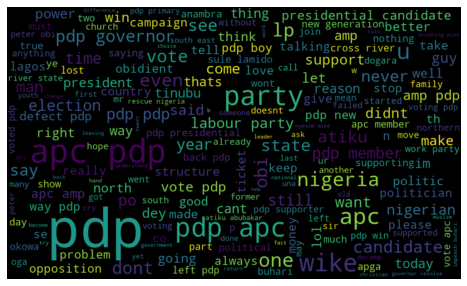

In [104]:
# plot word cloud for sixth cluster
plot_wordcloud(cluster_7)


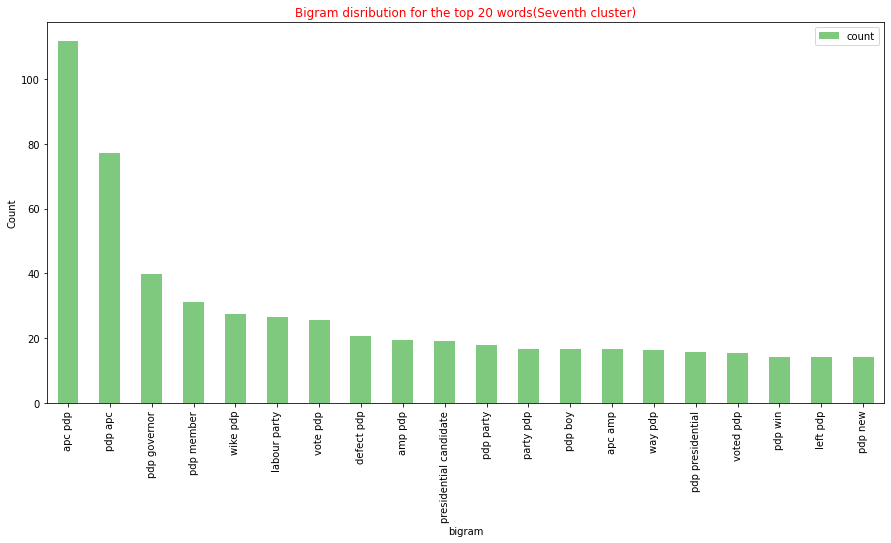

In [105]:
# bigram plot for seventhth cluster
bigram_plot(cluster_7,'Seventh cluster')


**The seventh cluster Talks about the people, what they think and do,how they will vote,who they supports**

In [106]:
# get sample of tweets in the 8th cluster
cluster_8.sample(10)

tweet  cluster
32406  please fellow obidatti2023 obidientlyyusful al...        7
58864  people better taking buhari disastrous legacy ...        7
24850  group people enjoy good service abroad swore g...        7
10675  squad outsourced opposition people 7 yearsgmb ...        7
42796  kind narrow analysis typical apc people consid...        7
16363  obidatti023 ticket best duo history two people...        7
20444                           people supporting tinubu        7
1220   tinubu electoral reform curator personate sanc...        7
54775  guy indirectly mocked atiku tweet people takin...        7
39008  rightly named adamu man took 80million people ...        7

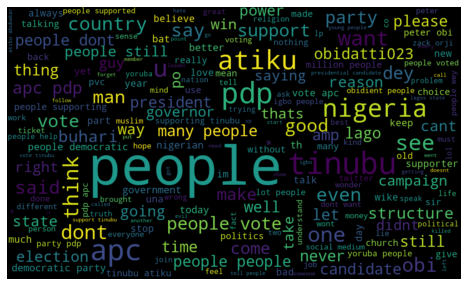

In [107]:
# plot word cloud for sixth cluster
plot_wordcloud(cluster_8)


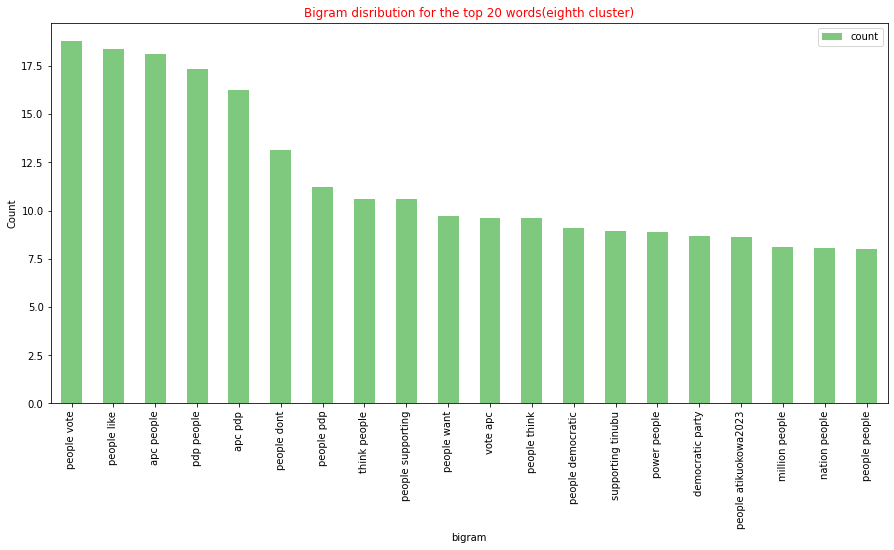

In [108]:
# bigram plot for sixth cluster
bigram_plot(cluster_8,'eighth cluster')

**The eight Cluster focus on presidential aspirant Tinubu**

### Gap Statistics

In [109]:
#!pip install gap_statistic


In [262]:
from gap_statistic import OptimalK

# creat function
def KMeans_clustering_func(X, k):
    
    # Include any clustering Algorithm that can return cluster centers
    
    m = KMeans(random_state=11, n_clusters=k)
    m.fit(X)
    
    # Return the location of each cluster center and the labels for each point.
    return m.cluster_centers_, m.predict(X)

# create a wrapper around OptimalK to extract cluster centers and cluster labels
optimalK = OptimalK(clusterer=KMeans_clustering_func)

# run optimal K on the input data (subset_scaled_interim) and number of clusters

n_clusters = optimalK(X = np.random.uniform(0,1,(500,5)), cluster_array=np.arange(1,10))
print('Optimal clusters: ', n_clusters)

# Gap Statistics data frame
optimalK.gap_df[['n_clusters', 'gap_value']]

Optimal clusters:  8


n_clusters  gap_value
0         1.0  -0.004589
1         2.0  -0.009820
2         3.0  -0.016028
3         4.0  -0.025659
4         5.0  -0.022700
5         6.0  -0.022115
6         7.0  -0.010968
7         8.0   0.007120
8         9.0   0.001011

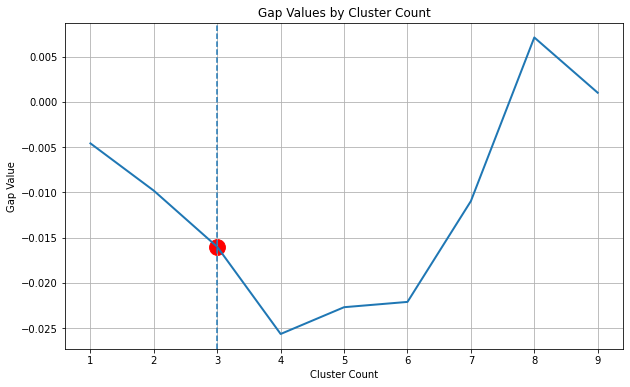

In [265]:
plt.figure(figsize=(10,6))
n_clusters=3
plt.plot(optimalK.gap_df.n_clusters, optimalK.gap_df.gap_value, linewidth=2)
plt.scatter(optimalK.gap_df[optimalK.gap_df.n_clusters == n_clusters].n_clusters,
            optimalK.gap_df[optimalK.gap_df.n_clusters == n_clusters].gap_value, s=250, c='r')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')
plt.axvline(3, linestyle="--")
plt.show()


### VISUALIZING CLUSTERS

In [266]:
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD


In [267]:
# decompose X sparse matrix to lower dimensional  space

k=8
X_reduced = TruncatedSVD(n_components=k, random_state=0).fit_transform(X)

# find 2-D representation of X_reduced using tsne
X_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_reduced)


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 63664 samples in 0.114s...
[t-SNE] Computed neighbors for 63664 samples in 11.320s...
[t-SNE] Computed conditional probabilities for sample 1000 / 63664
[t-SNE] Computed conditional probabilities for sample 2000 / 63664
[t-SNE] Computed conditional probabilities for sample 3000 / 63664
[t-SNE] Computed conditional probabilities for sample 4000 / 63664
[t-SNE] Computed conditional probabilities for sample 5000 / 63664
[t-SNE] Computed conditional probabilities for sample 6000 / 63664
[t-SNE] Computed conditional probabilities for sample 7000 / 63664
[t-SNE] Computed conditional probabilities for sample 8000 / 63664
[t-SNE] Computed conditional probabilities for sample 9000 / 63664
[t-SNE] Computed conditional probabilities for sample 10000 / 63664
[t-SNE] Computed conditional probabilities for sample 11000 / 63664
[t-SNE] Computed conditional probabilities for sample 12000 / 63664
[t-SNE] Computed conditional probabilities for s

In [268]:
# create dataframe
data_embedded = pd.DataFrame(list(zip(X_embedded[:,0],X_embedded[:,1], labels)), columns= ['Dim1', 'Dim2', 'cluster'])


<Figure size 1440x720 with 0 Axes>

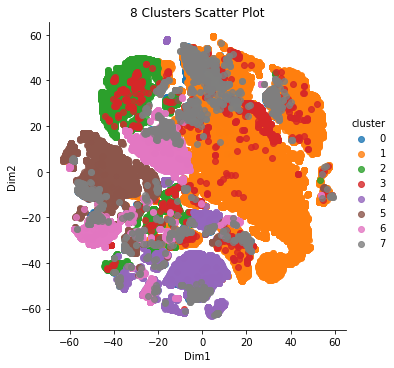

In [270]:
# plot the 8 clusters
plt.figure(figsize=(20,10))

sns.lmplot( data = data_embedded, x = 'Dim1', y = 'Dim2', hue='cluster', fit_reg=False, 
                   legend=True, legend_out=True)

plt.title('8 Clusters Scatter Plot')
plt.show()